<a href="https://colab.research.google.com/github/aru2001/PenCardReader/blob/main/pencardReadernew1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/machine learning'

/content/gdrive/My Drive/machine learning


In [3]:
!pip install easyocr

     |████████████████████████████████| 62.4MB 53kB/s 


In [4]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 8,16


In [5]:
reader = easyocr.Reader(['en'])

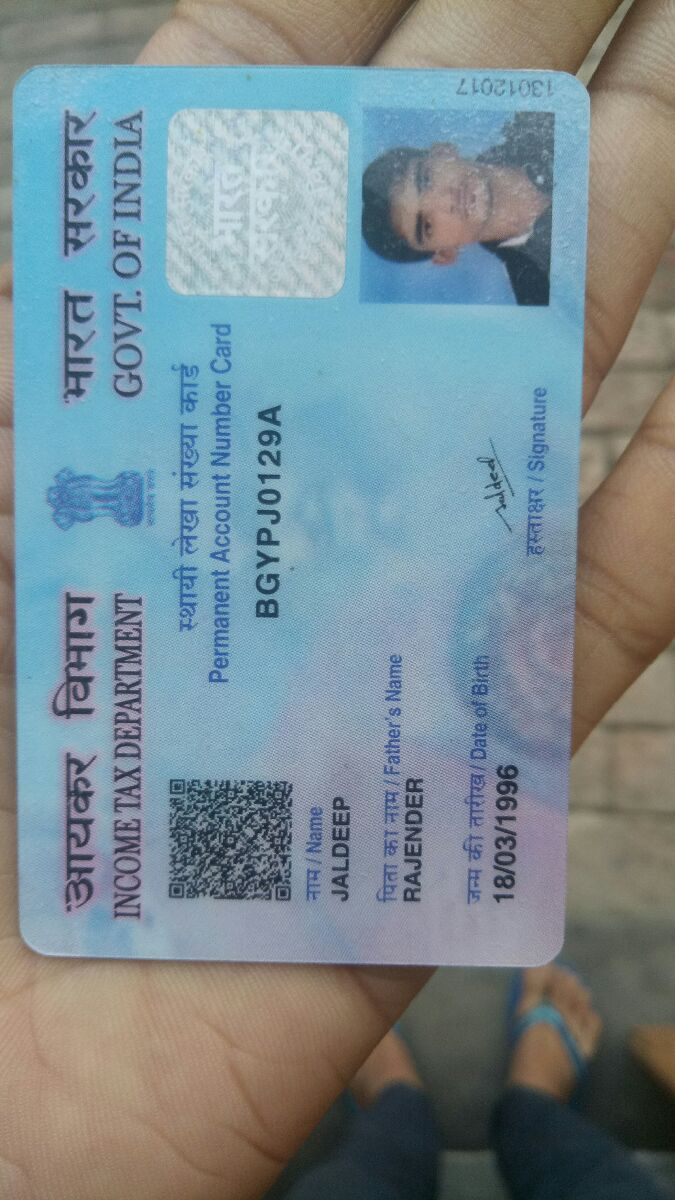

In [45]:
#Image('pencard.png')
from google.colab.patches import cv2_imshow

img = cv2.imread('pen3.jpg')


cv2_imshow(img)

In [65]:
from scipy.ndimage import rotate
import cv2
import re

def ocr(img,cnt):
  
  output = reader.readtext(img)
  temp =[]
  
  date_of_birth=0
  Acc_num=0
  for i in range(len(output)):
    temp.append(output[i][1])
  
  dob = re.compile(r'\d\d/\d\d/\d\d\d\d') 
  num = re.compile("^[A-Z0-9]*$")
  
  for i in temp:
    if re.search(dob, i) !=None:
      date_of_birth = i
    if re.search(num,i) and (len(i) == 10):
      Acc_num = i
    
  
  if (date_of_birth !=0) and (Acc_num !=0):
  
    return "date of Birth: "+str(date_of_birth)+"  Account_Number: "+str(Acc_num)
  else:

    if cnt <=4:
      rotate_img = rotate(img, 90)
      cnt+=1
      
      return ocr(rotate_img,cnt)
    else:
      return "please upload correct img"

cnt=1
try:
  img = cv2.imread('pencard.png')
  result = ocr(img,cnt)
  print(result)
except:
  print("Image not found.")


date of Birth: 30/01/1997  Account_Number: ELWPM8089J
